Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_67 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6886 - acc: 0.8259
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3422 - acc: 0.9033
Epoch 3/5
60000/60000 [========

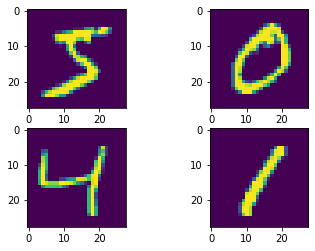

In [63]:
#zadatak_1 1.dio 

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(x_train[0])
axs[0, 1].imshow(x_train[1])
axs[1, 0].imshow(x_train[2])
axs[1, 1].imshow(x_train[3])

# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)


# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu
model = Sequential()
model.add(keras.Input(shape=input_shape))
model.add(layers.Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()


# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
model.compile(loss='categorical_crossentropy',
 optimizer='sgd',
 metrics=['accuracy'])


# TODO: provedi ucenje mreze
model.fit(x_train_s, y_train_s, epochs=5, batch_size=32)


# TODO: Prikazi test accuracy i matricu zabune
loss_and_metrics = model.evaluate(x_test_s, y_test_s, batch_size=128)
print(loss_and_metrics)

classes = model.predict(x_test_s, batch_size=128)
classes_cat = np.zeros_like(classes)

for row in range(len(classes)):
    maxArg = classes[row].argmax()
    classes_cat[row, maxArg] = 1

cm = multilabel_confusion_matrix(y_test_s, classes_cat)
print("matric zabune\n", cm)


# TODO: spremi model
model.save("network")



In [64]:
#zadatak_1 2. dio

modelConv = keras.Sequential()
modelConv.add(layers.Conv2D(28,(3,3), activation='relu', input_shape=input_shape))
modelConv.add(layers.MaxPooling2D((2,2)))
modelConv.add(layers.Conv2D(56,(3,3), activation='relu'))
modelConv.add(layers.MaxPooling2D((2,2,)))
modelConv.add(layers.Flatten())
modelConv.add(layers.Dense(units=64, activation='relu'))
modelConv.add(layers.Dense(units=10, activation='softmax'))
modelConv.summary()

modelConv.compile(loss='categorical_crossentropy',
 optimizer='sgd',
 metrics=['accuracy'])

modelConv.fit(x_train_s, y_train_s, epochs=5, batch_size=32)

loss_and_metrics = modelConv.evaluate(x_test_s, y_test_s, batch_size=128)

print(loss_and_metrics)

classesC = modelConv.predict(x_test_s, batch_size=128)
classes_catC = np.zeros_like(classesC)

for row in range(len(classesC)):
    maxArg = classesC[row].argmax()
    classes_catC[row, maxArg] = 1
    
model.save("convNetwork")


Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 1400)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 64)                89664     
_________________________________________________________________
dense_69 (Dense)             (None, 10)              

In [65]:
#zadatak_2

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import matplotlib.image as mpimg
import numpy as np

filename = 'test.png'

img = mpimg.imread(filename)
img = color.rgb2gray(img)
img = resize(img, (28, 28))


plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')


# TODO: ucitaj model
model = keras.models.load_model('convNetwork')

# TODO: napravi predikciju 


# TODO: ispis rezultat
print("------------------------")
print()

FileNotFoundError: [Errno 2] No such file or directory: 'test.png'